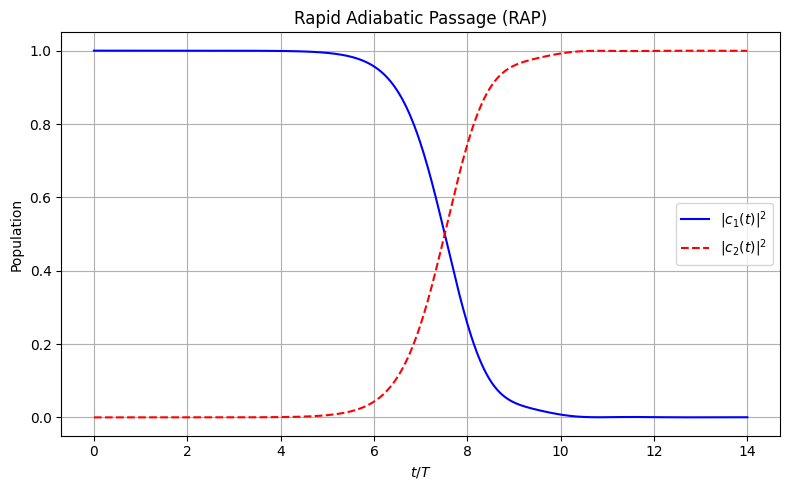

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

T = 1
phi = 0
omega0 = 3/ T
delta0 = 3 / T
t0 = 7.5 * T


def sech(x):
    return 1 / np.cosh(x)

def omega(t):
    return omega0 * sech((t - t0) / T)

def delta(t):
    return delta0 * np.tanh((t - t0) / T)


def diff_eqs(t, y):
    c1, c2 = y
    dc1 = (-1j / 2) * omega(t) * np.exp(-1j * phi) * c2
    dc2 = (-1j / 2) * omega(t) * np.exp(1j * phi) * c1 - 1j * delta(t) * c2
    return [dc1, dc2]


y0 = [1.0 + 0j, 0.0 + 0j]

t_span = (0, 14 * T)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(diff_eqs, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)


pop_c1 = np.abs(sol.y[0])**2
pop_c2 = np.abs(sol.y[1])**2

plt.figure(figsize=(8, 5))
plt.plot(sol.t / T, pop_c1, 'b', label=r'$|c_1(t)|^2$')
plt.plot(sol.t / T, pop_c2, 'r--', label=r'$|c_2(t)|^2$')
plt.xlabel(r'$t/T$')
plt.ylabel('Population')
plt.title('Rapid Adiabatic Passage (RAP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
